<a href="https://colab.research.google.com/github/alleyex/kaggle_lab/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!wget "https://raw.githubusercontent.com/alleyex/kaggle_lab/main/houseprice/data/test.csv"
!wget "https://raw.githubusercontent.com/alleyex/kaggle_lab/main/houseprice/data/train.csv"

--2024-05-25 11:07:32--  https://raw.githubusercontent.com/alleyex/kaggle_lab/main/houseprice/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving to: ‘test.csv.10’

test.csv.10         100%[===================>] 440.83K  2.86MB/s    in 0.2s    

2024-05-25 11:07:33 (2.86 MB/s) - ‘test.csv.10’ saved [451405/451405]

--2024-05-25 11:07:33--  https://raw.githubusercontent.com/alleyex/kaggle_lab/main/houseprice/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [tex

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


from subprocess import check_output
from scipy.stats import norm
from scipy import stats


In [96]:
warnings.filterwarnings("ignore")
print(check_output(['ls', ]).decode("utf8"))

train_data = pd.read_csv("train.csv")
print(f"Shape of train_data: {train_data.shape}")
test_data = pd.read_csv("test.csv")
print(f"Shape of test_data:  {test_data.shape}")


sample_data
test.csv
test.csv.1
test.csv.10
test.csv.2
test.csv.3
test.csv.4
test.csv.5
test.csv.6
test.csv.7
test.csv.8
test.csv.9
train.csv
train.csv.1
train.csv.10
train.csv.2
train.csv.3
train.csv.4
train.csv.5
train.csv.6
train.csv.7
train.csv.8
train.csv.9

Shape of train_data: (1460, 81)
Shape of test_data:  (1459, 80)


In [97]:
pd.set_option('display.max_columns', None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [99]:
train_data.dtypes.value_counts().to_frame().T

,object,int64,float64
count,43,35,3


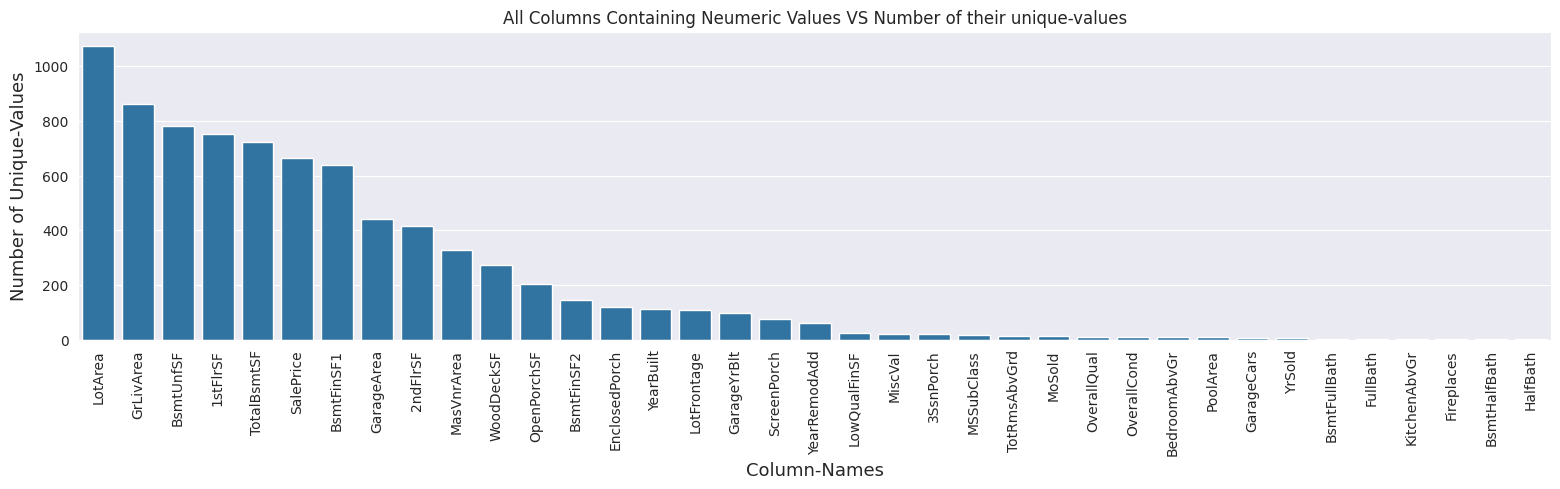

In [100]:
num_cols = train_data.select_dtypes(include = ["int64", "float64"])

uni_values = train_data[num_cols.columns].nunique()

col_list = list(zip(num_cols.columns, uni_values))
col_list = sorted(col_list, key = lambda cols: cols[1],  reverse = True)
col_list = pd.DataFrame(col_list, columns = ["Name", "Value"])

for name in ["Id"]:
  col_list = col_list.drop(col_list[col_list["Name"] == name].index)

sns.set_style('darkgrid')

plt.subplots(figsize=(19, 4))
sns.barplot(x = col_list["Name"], y = col_list["Value"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title("All Columns Containing Neumeric Values VS Number of their unique-values")
plt.show()


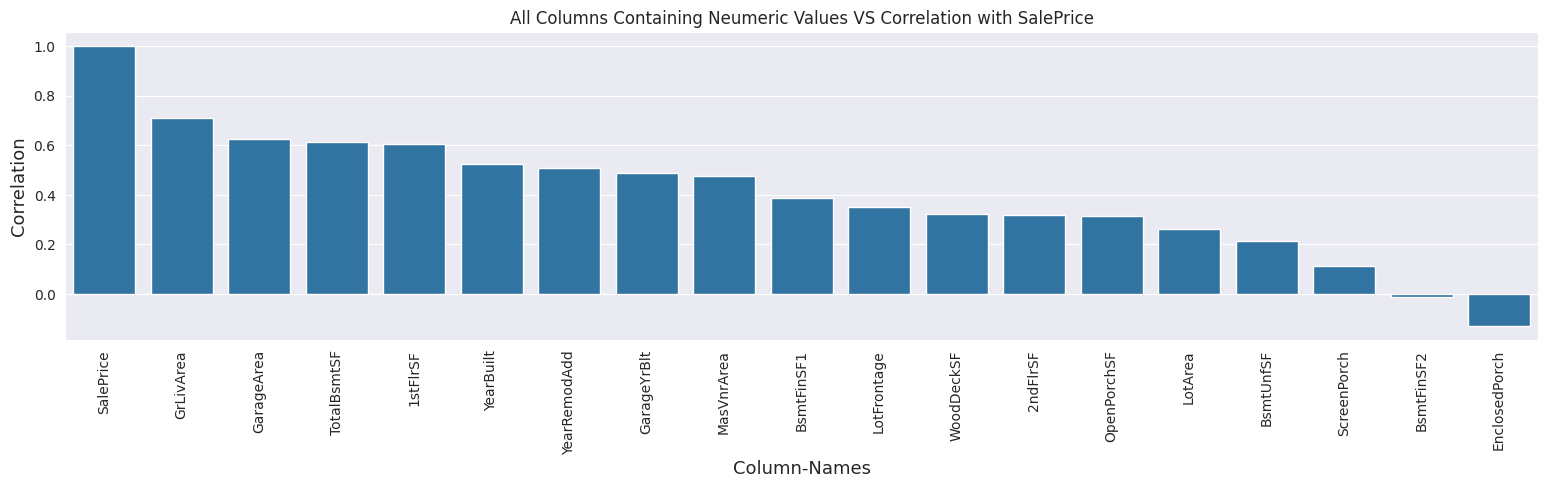

In [101]:
highly_cols = col_list.drop(col_list[col_list['Value'] < 49].index)
cols = highly_cols["Name"]
corrs = []

for col in cols:
  corrs.append(num_cols[col].corr(num_cols['SalePrice']))

corr_data = pd.DataFrame(list(zip(cols, corrs)), columns = ["Name", "Correlation"])
corr_data = corr_data.sort_values(by = "Correlation" , ascending = False)

plt.subplots(figsize = (19, 4))
sns.barplot(x = corr_data["Name"], y = corr_data["Correlation"])
plt.xticks(rotation = 90)
plt.ylabel('Correlation', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title("All Columns Containing Neumeric Values VS Correlation with SalePrice")
plt.show()


In [102]:
train_data.shape

(1460, 81)

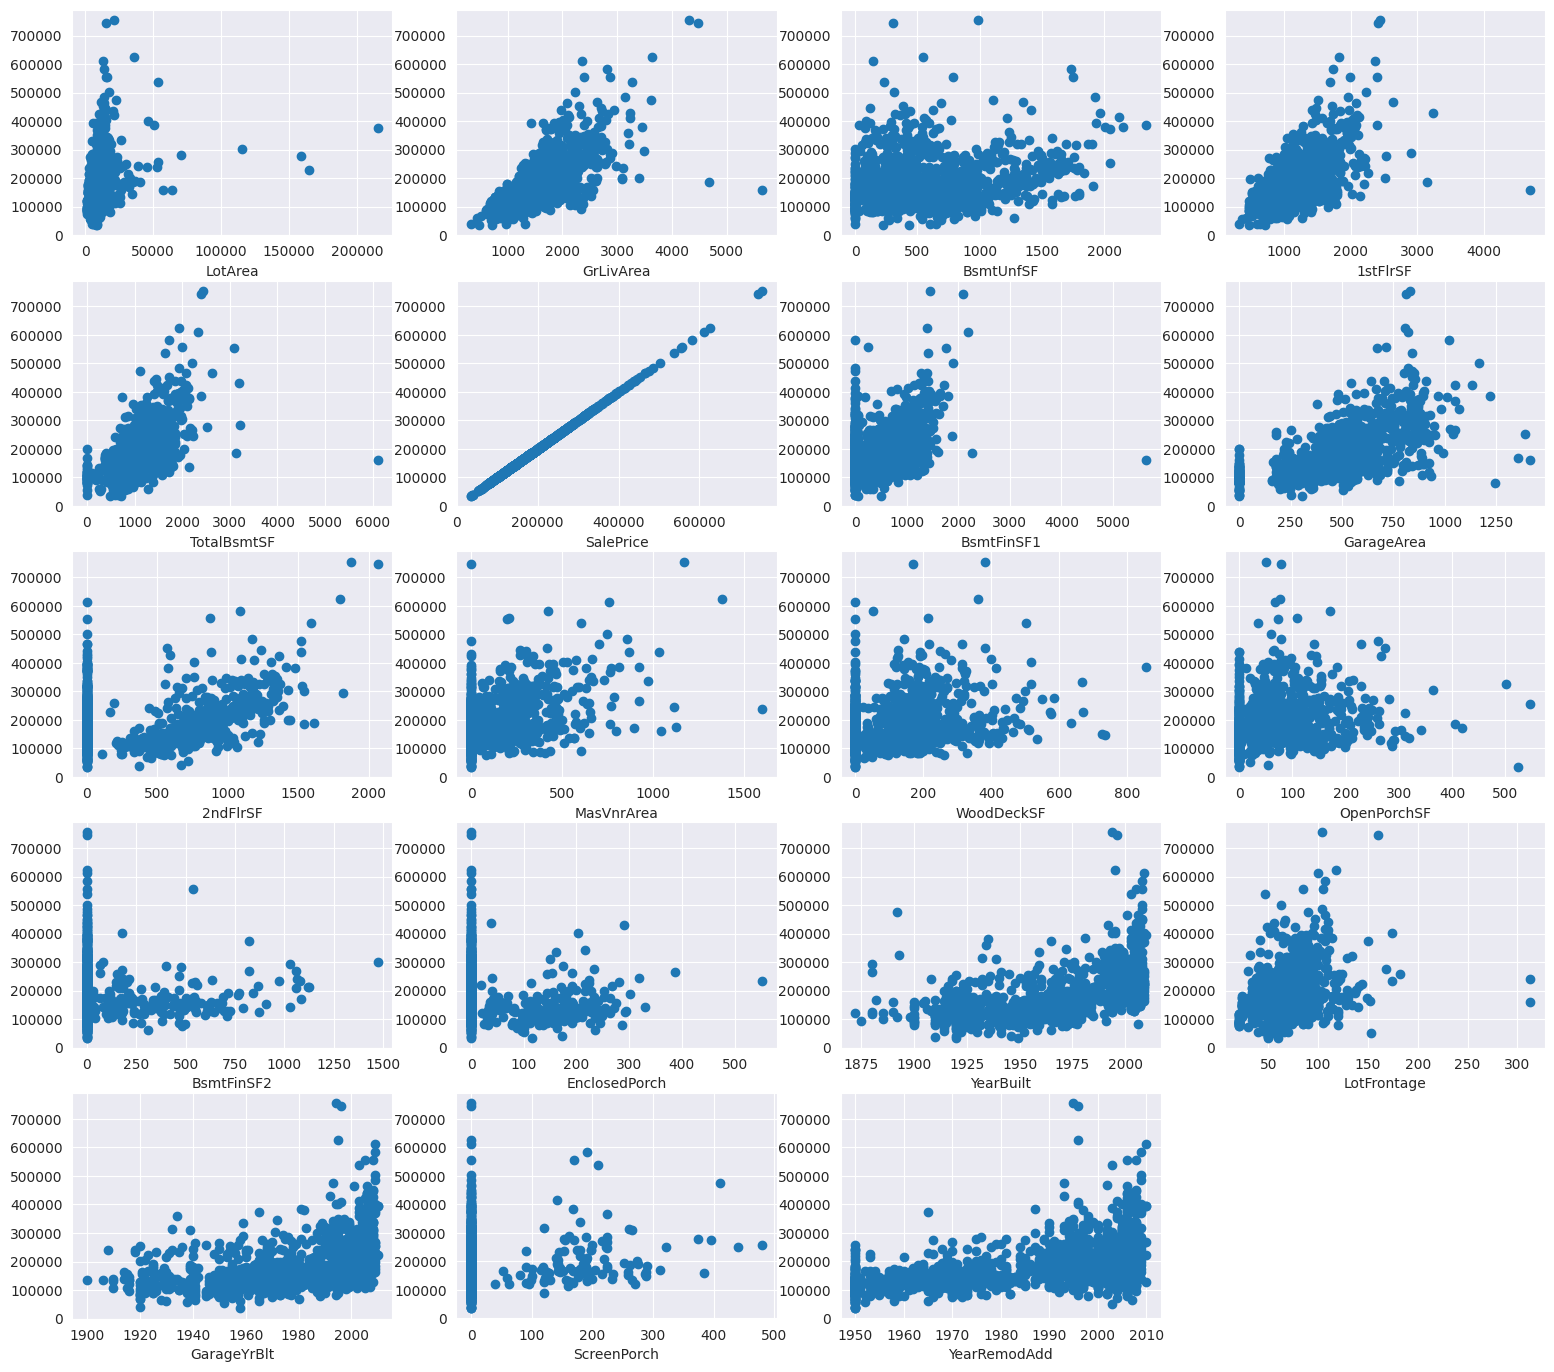

In [103]:
def relation_with_price(loc, col):
  plt.subplot(5, 4, loc)
  plt.scatter(x = train_data[col], y = train_data["SalePrice"])
  plt.xlabel(col)

loc = 1
plt.subplots(figsize = (19, 17))
for col in cols:
  relation_with_price(loc, col)
  loc += 1

plt.show()



In [104]:
def outlier_check_plot(col):
  plt.subplots(figsize = (19, 5))

  plt.subplot(1, 3, 1)

  plt.scatter(x = train_data[col].sort_values(ascending = False)[: 19], y = [0] * 19, color = "blue", label = "Train")
  plt.scatter(x = test_data[col].sort_values(ascending = False)[: 19], y = [1461] * 19, color = "red", label = "Test")

  plt.ylabel("Serial Number", fontsize = 10)
  plt.xlabel(col, fontsize = 10)
  plt.title(f"Fig A: 19 highest_values of category {col}\n in both train and test dataset", fontsize = 12)

  plt.legend(loc = "center right")

  plt.subplot(1, 3, 2)

  sns.kdeplot(train_data[col], color = "blue", label = "Train")
  sns.kdeplot(test_data[col], color = "red", label = "Test")
  sns.rugplot(train_data[col], color = "blue")
  sns.rugplot(test_data[col], color = "red")

  plt.xlim(xmax = train_data[col].max())
  plt.ylabel("Density", fontsize = 10)
  plt.xlabel(col, fontsize = 10)
  plt.title(f"Fig B: Density of category {col}\n in both train and test dataset", fontsize = 12)

  plt.legend(loc = "center right")

  plt.subplot(1, 3, 3)
  sns.scatterplot(x = train_data[col], y = train_data["SalePrice"], color = "blue", label = "Train")

  plt.ylabel("Sale Price", fontsize = 10)
  plt.xlabel(col, fontsize = 10)
  plt.title(f"Fig C: Scatterplot of category {col}\n in both train and test dataset", fontsize = 12)

  plt.legend(loc = "center right")

  plt.show()


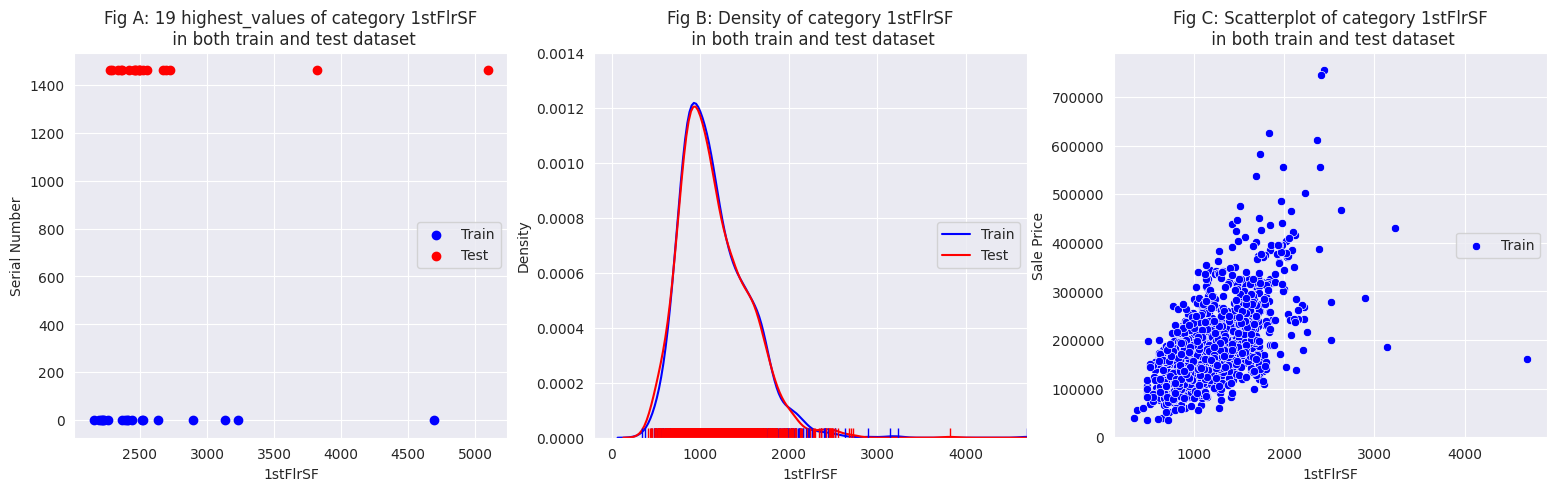

In [105]:
outlier_check_plot('1stFlrSF')

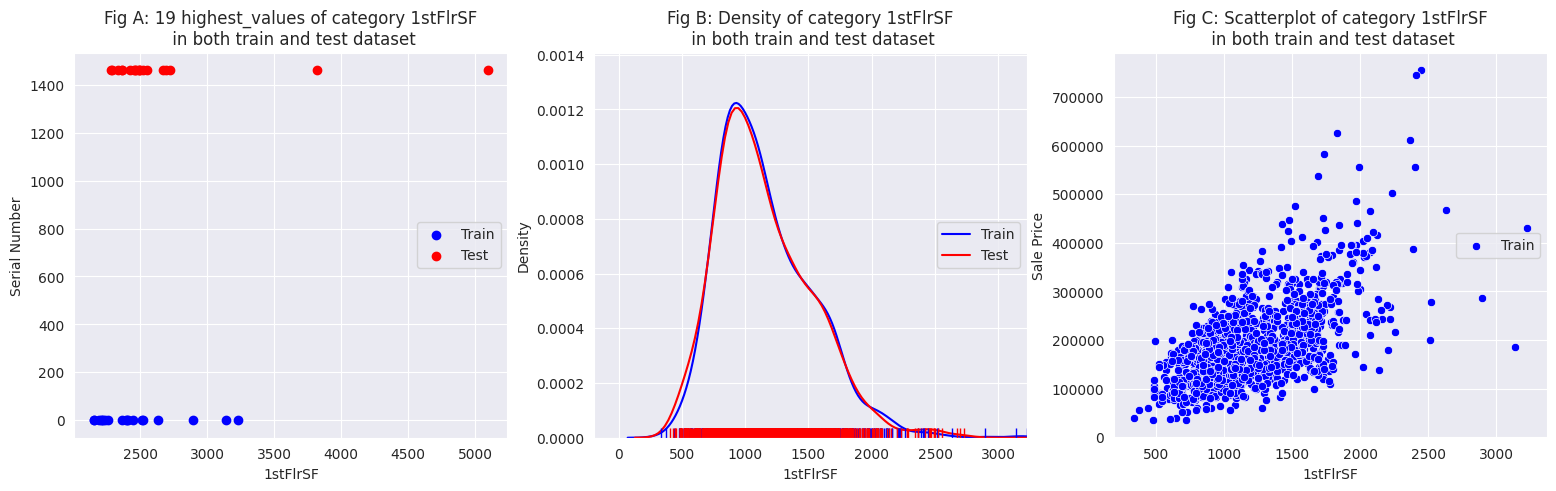

(1459, 81)

In [106]:
train_data = train_data.drop(train_data[train_data["1stFlrSF"] > 4000].index)
outlier_check_plot("1stFlrSF")

train_data.shape

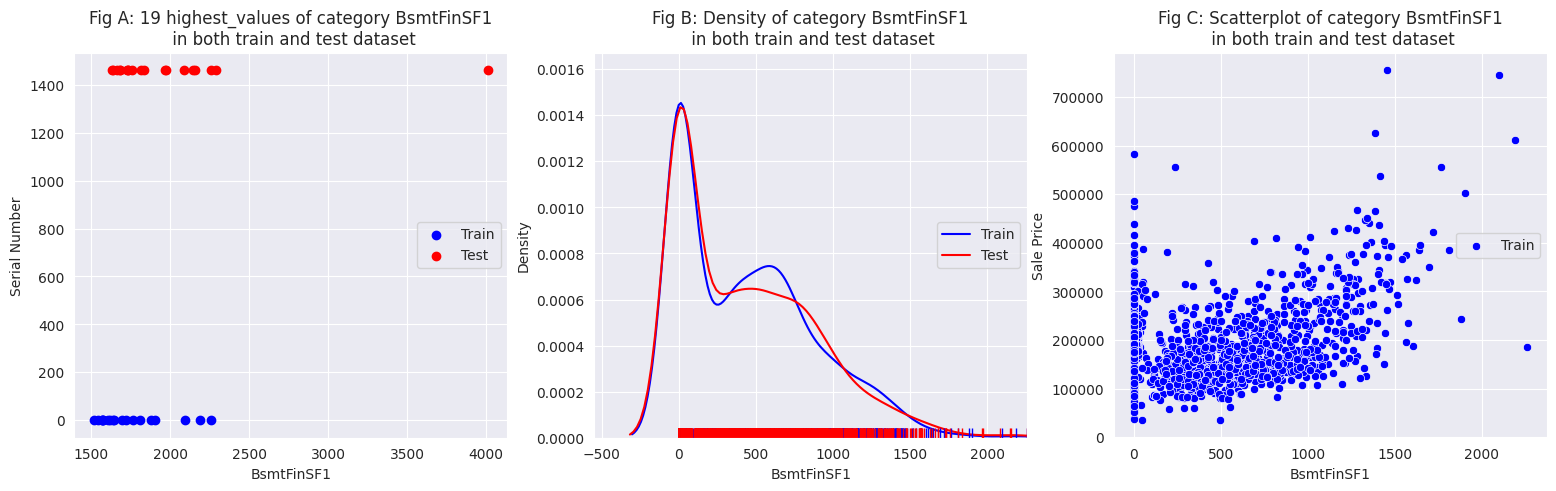

In [107]:
outlier_check_plot("BsmtFinSF1")

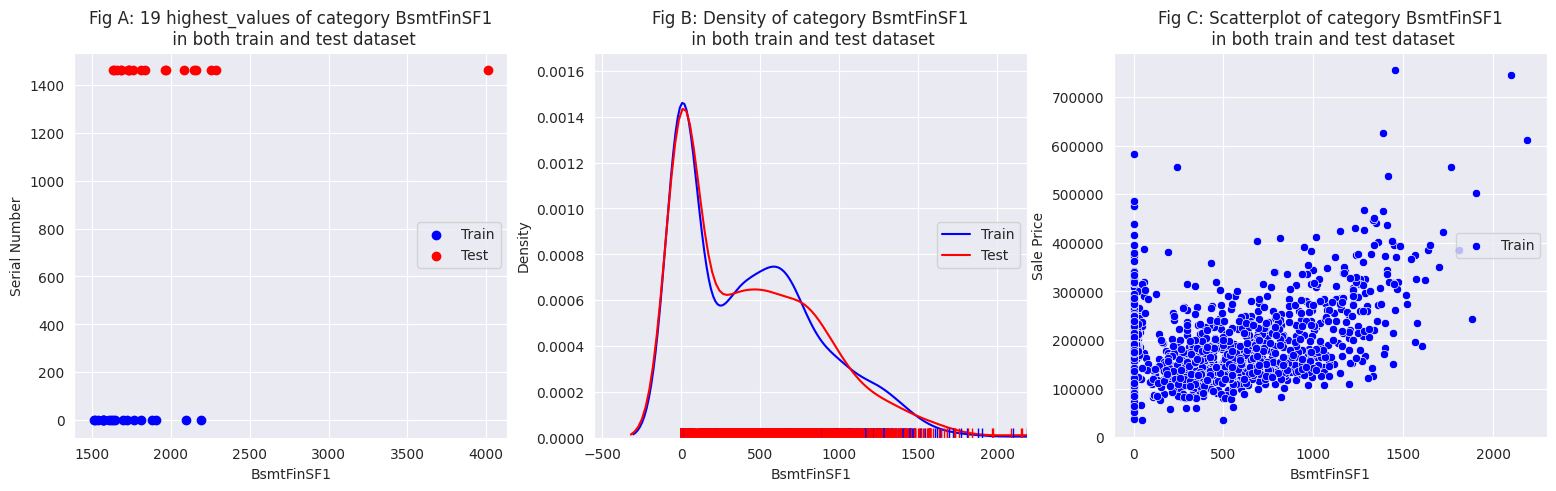

(1458, 81)

In [108]:
train_data = train_data.drop(train_data[(train_data["BsmtFinSF1"] > 2000) & (train_data["SalePrice"] < 300000)].index)
outlier_check_plot("BsmtFinSF1")

train_data.shape

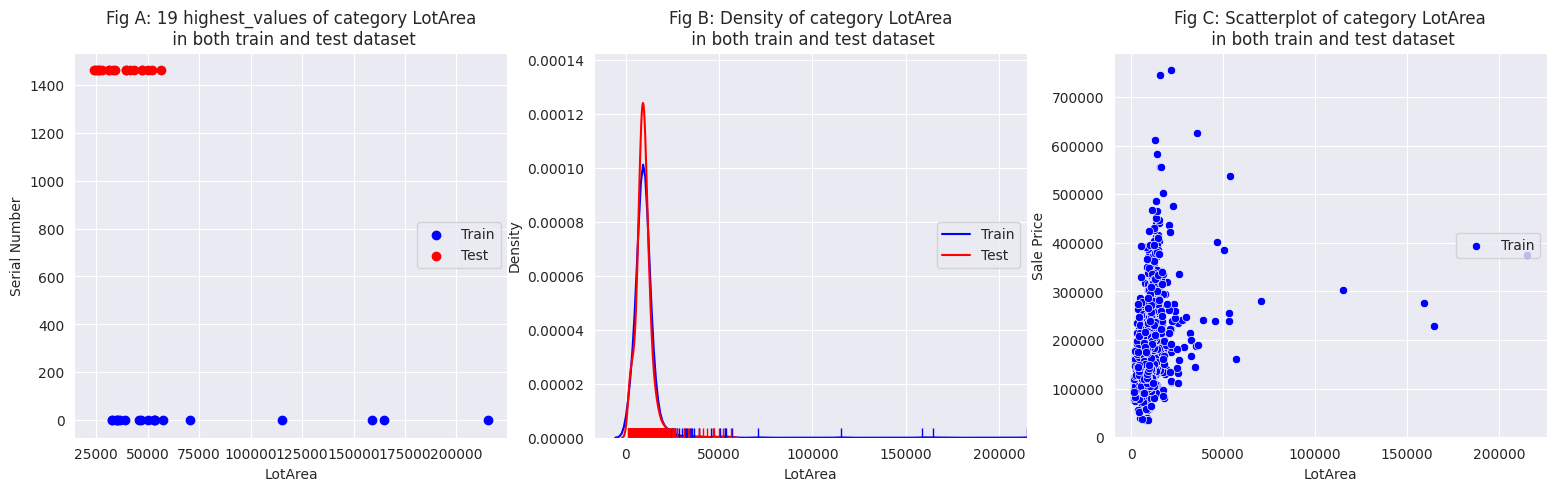

In [109]:
outlier_check_plot("LotArea")

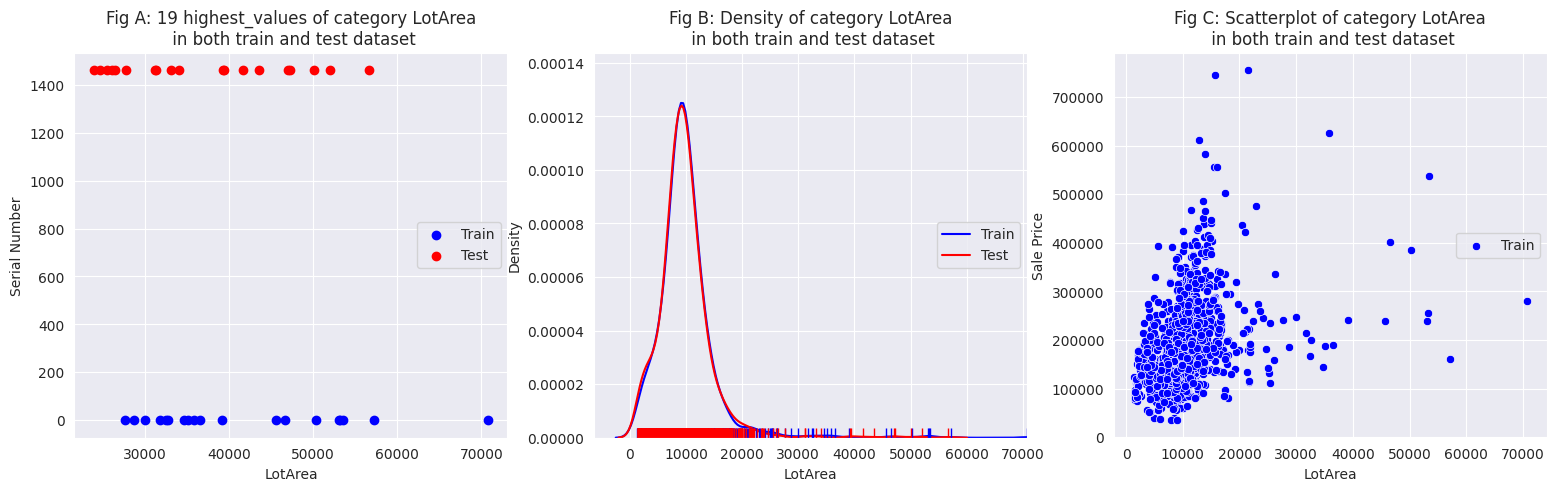

(1454, 81)

In [110]:
train_data = train_data.drop(train_data[train_data["LotArea"] > 80000].index)
outlier_check_plot("LotArea")

train_data.shape

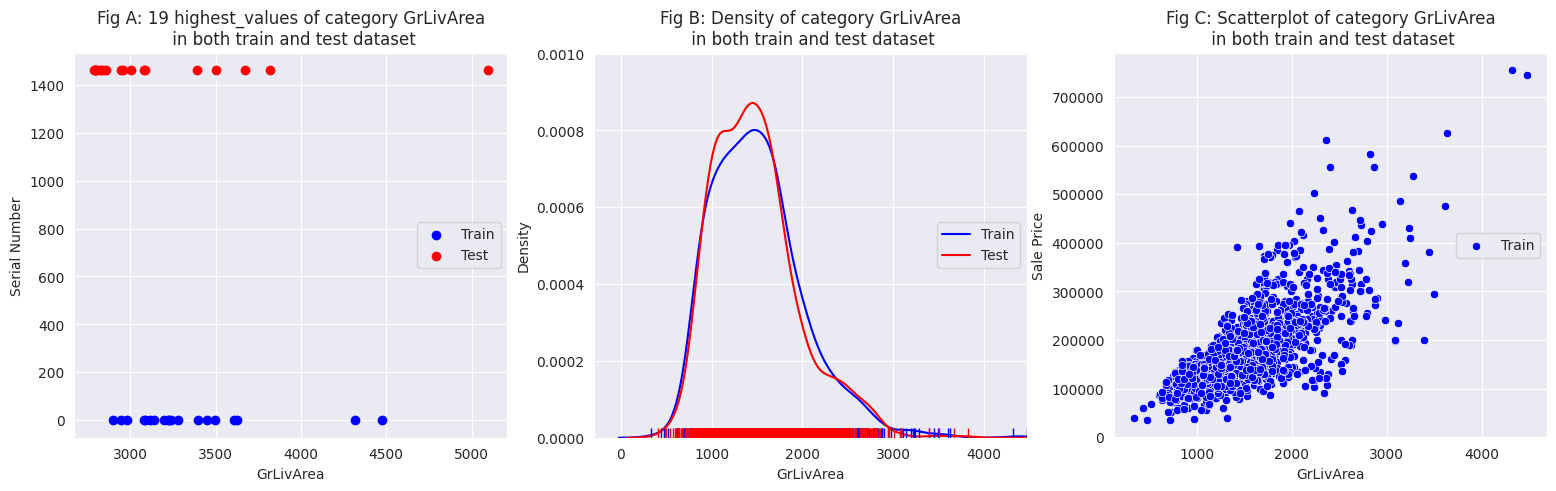

In [111]:
outlier_check_plot("GrLivArea")

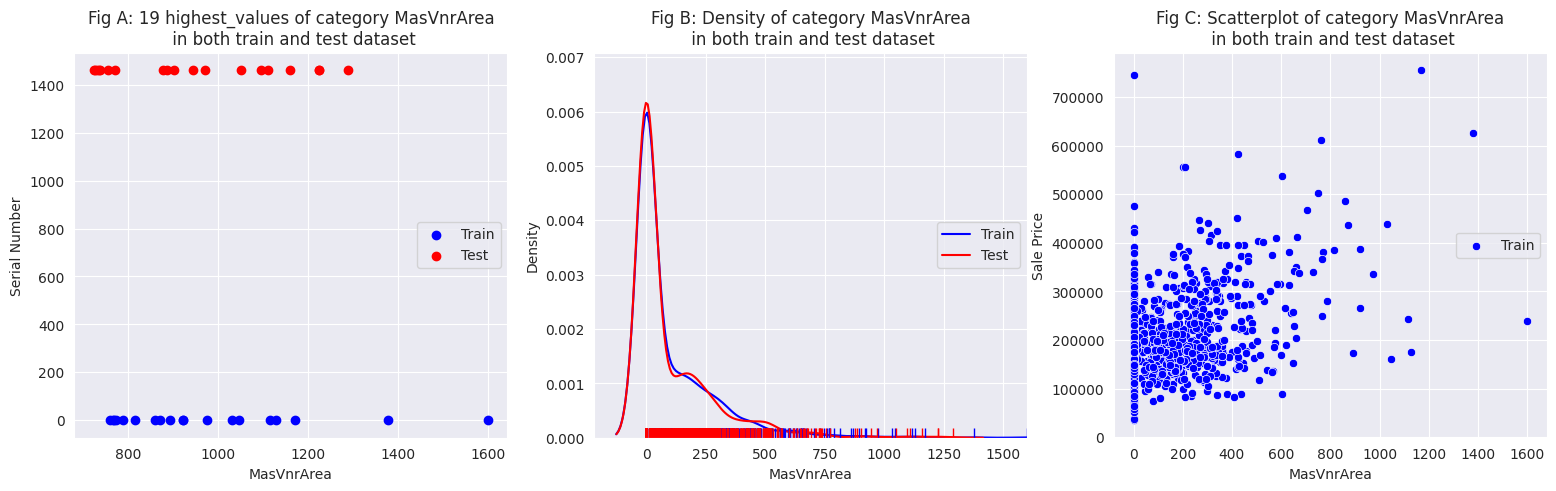

In [112]:
outlier_check_plot("MasVnrArea")

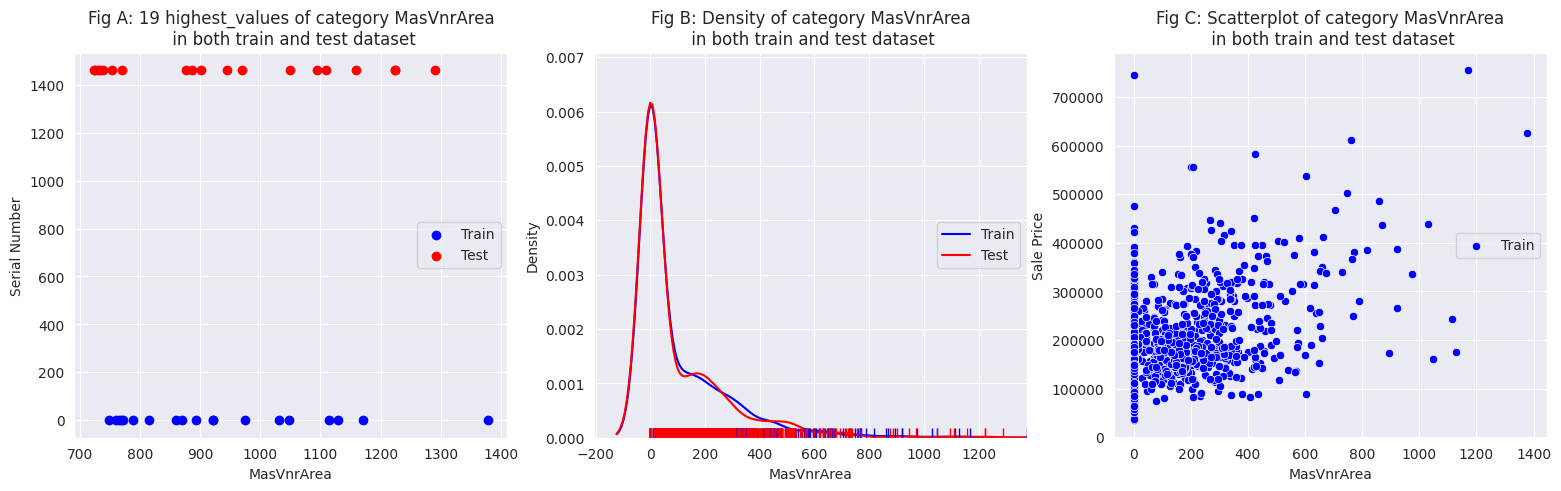

(1453, 81)

In [113]:
train_data = train_data.drop(train_data[train_data["MasVnrArea"] > 1500].index)
outlier_check_plot("MasVnrArea")

train_data.shape

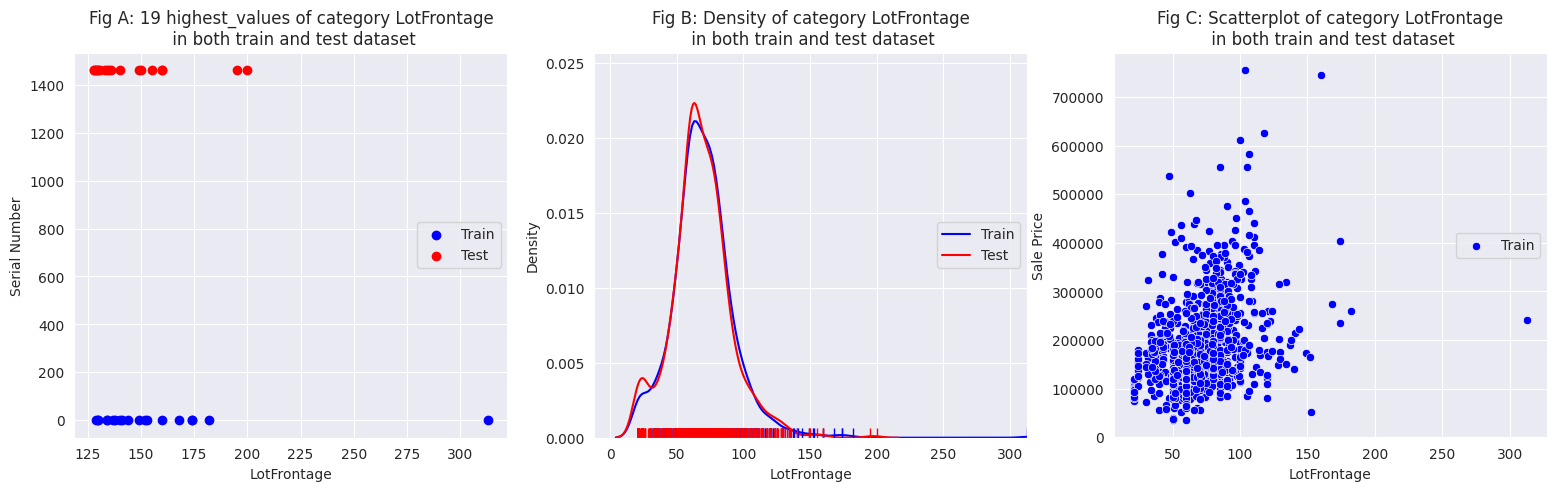

In [114]:
outlier_check_plot("LotFrontage")

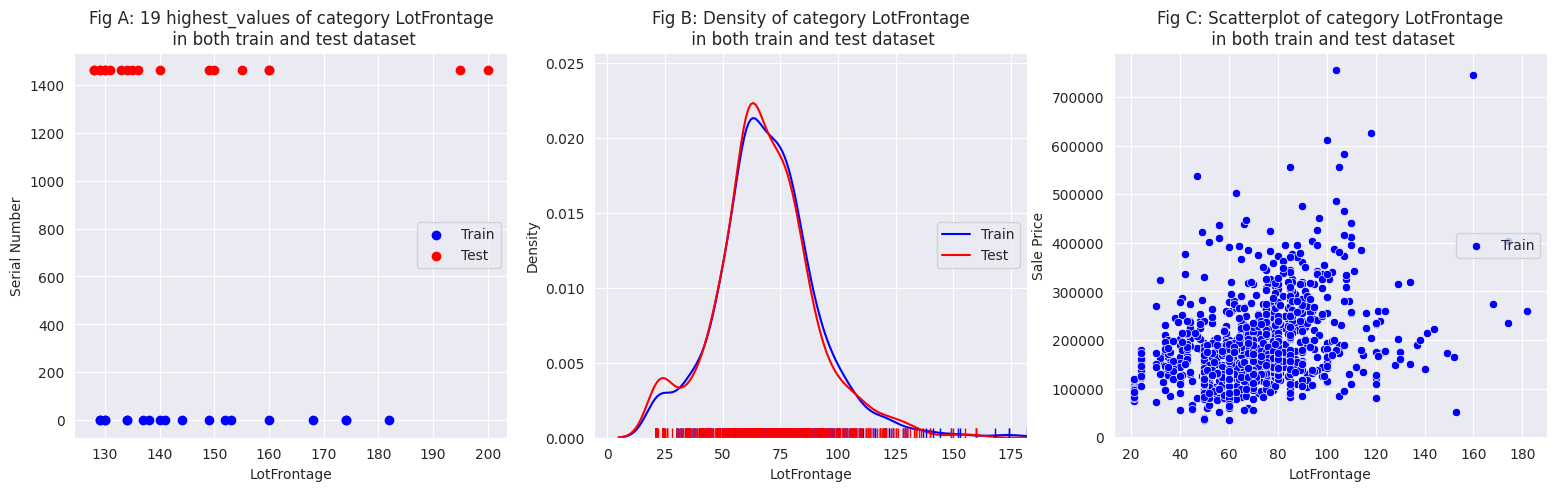

(1452, 81)

In [115]:
train_data = train_data.drop(train_data[train_data["LotFrontage"] > 200].index)
outlier_check_plot("LotFrontage")

train_data.shape

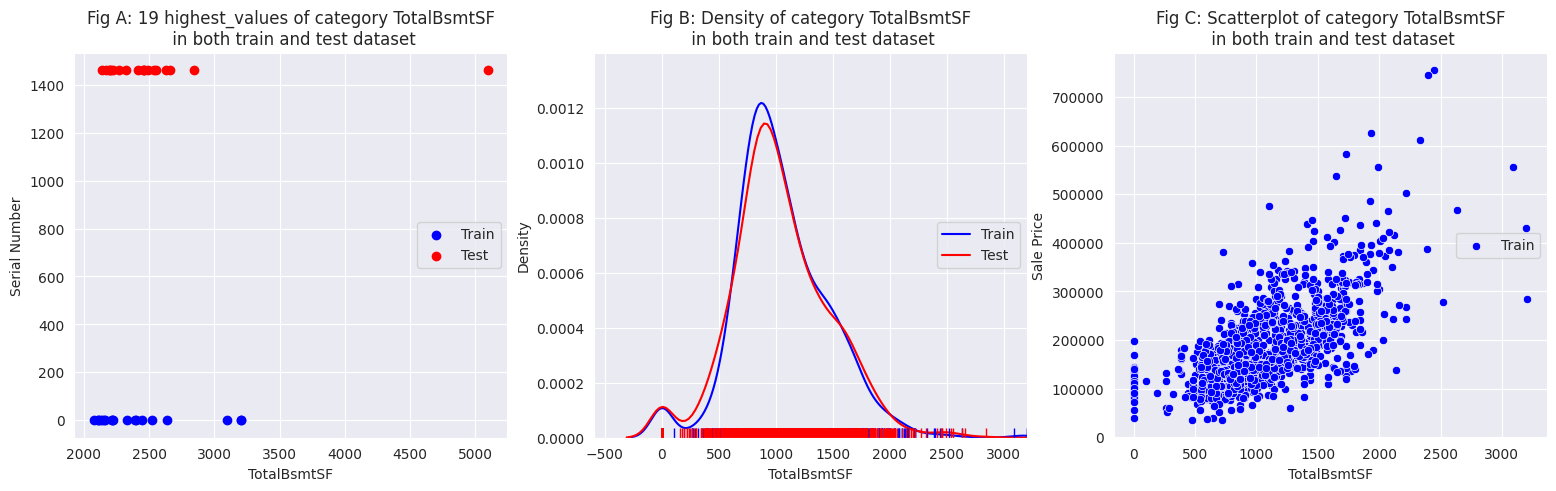

In [116]:
outlier_check_plot("TotalBsmtSF")

# Normalizing Label-Column

In [117]:
def check_distribution(col):

  plt.subplots(figsize = (16, 5))

  plt.subplot(1, 2, 1)

  (mu, sigma) = norm.fit(train_data[col])

  sns.histplot(data = train_data[col], kde = True, stat = "density", color = "blue", )
  x = np.linspace(train_data[col].min(), train_data[col].max(), 100)
  p = norm.pdf(x, mu, sigma)
  plt.plot(x, p, 'k', linewidth = 2)
  plt.legend([f'mu= {mu:.2f} & sigma= {sigma:.2f} in normal-dist'], loc='best', fontsize=13)
  plt.ylabel('Frequency')
  plt.title('Distribution')

  plt.subplot(1, 2, 2)
  stats.probplot(train_data[col], plot = plt)
  plt.title('Q-Q Plot')

  plt.show()




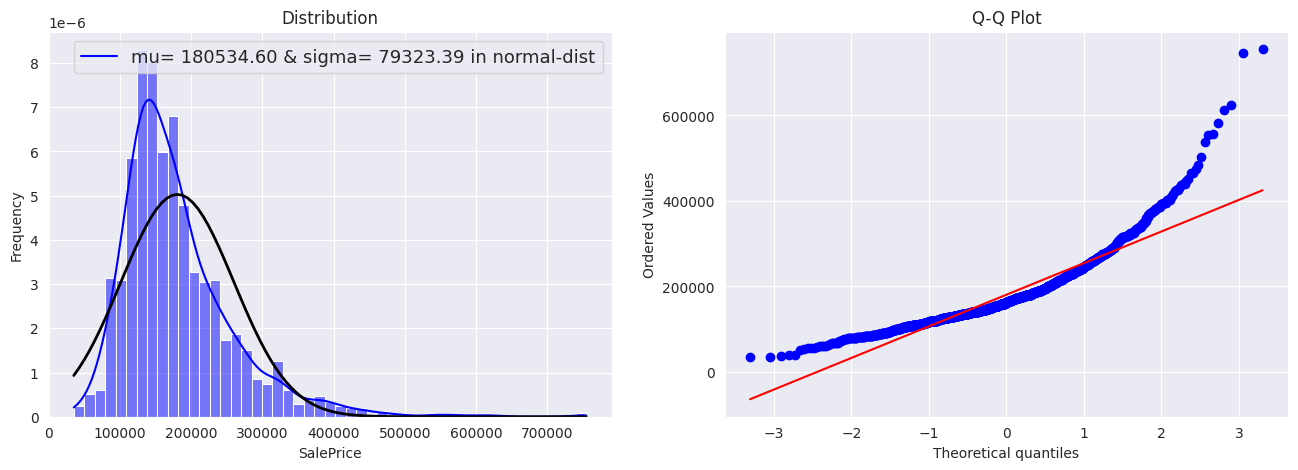

In [118]:
check_distribution("SalePrice")

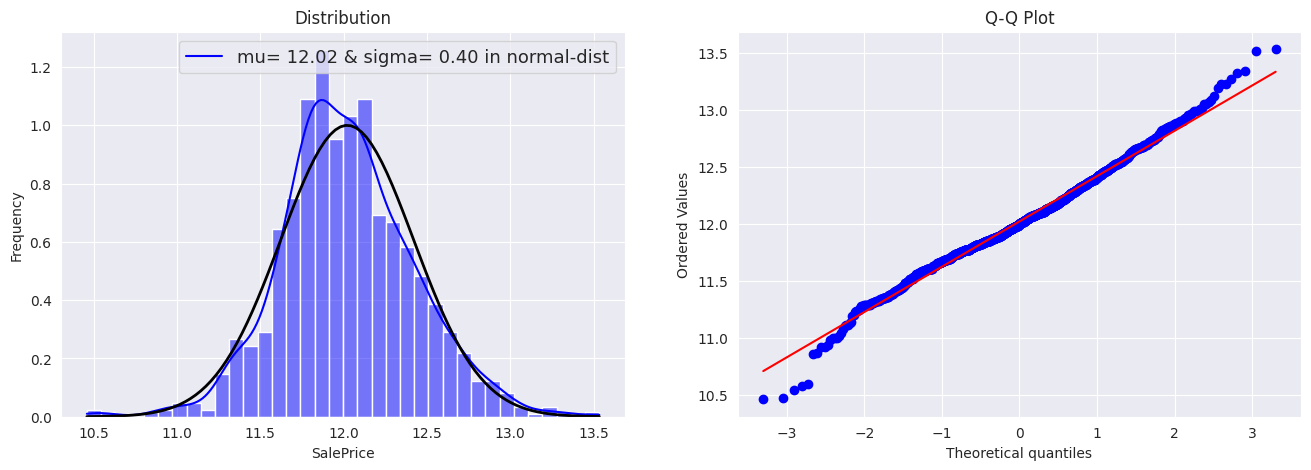

(1452, 81)

In [119]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
check_distribution("SalePrice")

train_data.shape

# Concatenating Train and Test Datasets

In [120]:
y_train = train_data.pop("SalePrice")
all_data = pd.concat((train_data, test_data)).reset_index(drop = True)
all_data.shape

(2911, 80)

# Dealing with missing Values

In [121]:
all_data_nan = all_data.isna().sum() / len(all_data)

all_data_nan = all_data_nan.drop(all_data_nan[all_data_nan  == 0].index)
all_data_nan = all_data_nan.sort_values(ascending = False)

missing_data = pd.DataFrame({
        "Missing Date Ratio": all_data_nan
})


missing_data.T

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrArea,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageArea,GarageCars,Electrical,KitchenQual,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
Missing Date Ratio,0.996908,0.964617,0.932326,0.803847,0.605634,0.487805,0.165922,0.05462,0.05462,0.05462,0.05462,0.053933,0.028169,0.028169,0.027825,0.027482,0.027138,0.007901,0.001374,0.000687,0.000687,0.000687,0.000687,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344


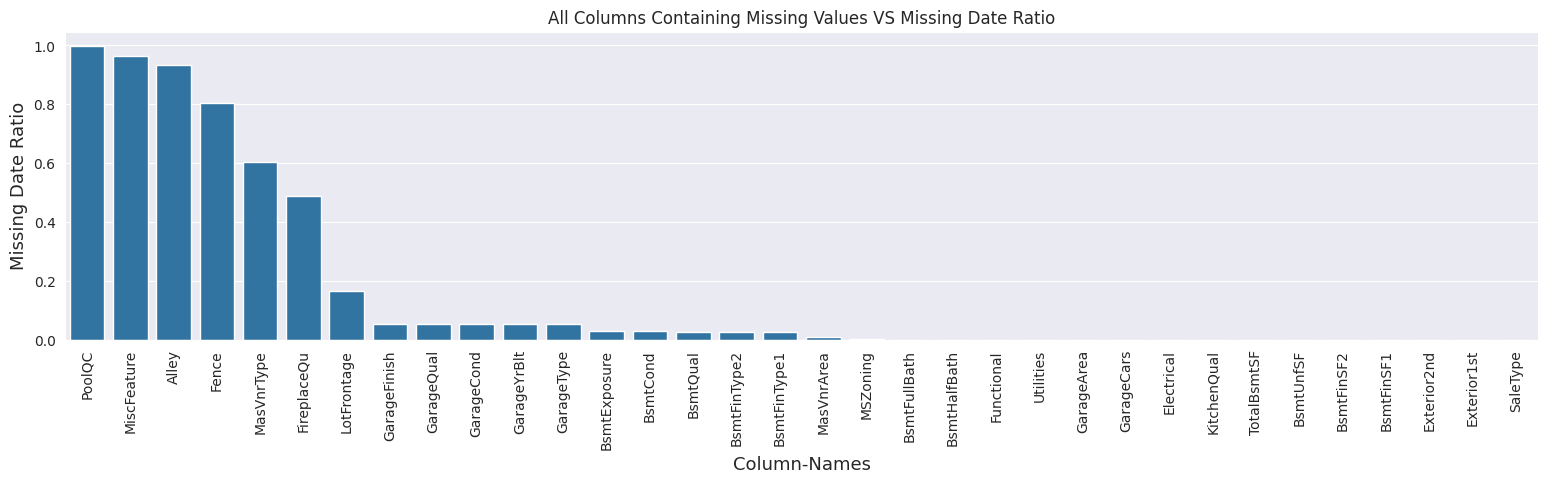

In [122]:
 plt.figure(figsize = (19, 4))

sns.barplot(x = missing_data.index, y = missing_data["Missing Date Ratio"])

plt.xticks(rotation = 90)
plt.ylabel('Missing Date Ratio', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title("All Columns Containing Missing Values VS Missing Date Ratio")

plt.show()


# Low Percentage Missing Value Columns: LPMVC

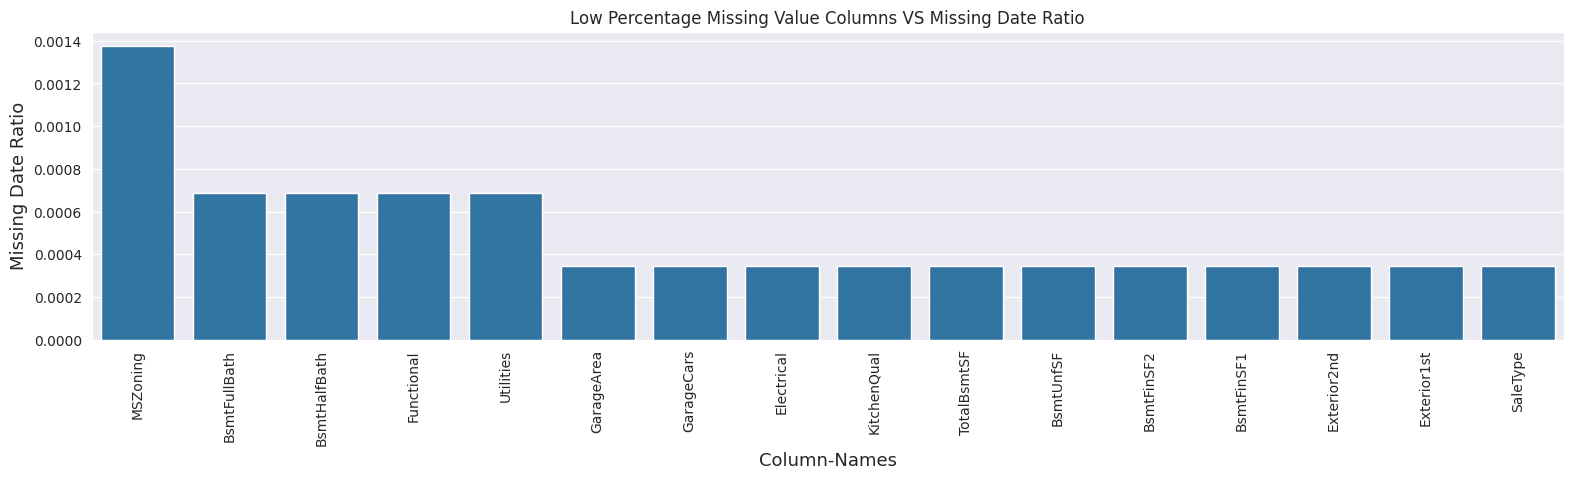

In [123]:
lpmvc = missing_data[18:]

plt.figure(figsize = (19, 4))

sns.barplot(x = lpmvc.index, y = lpmvc["Missing Date Ratio"])

plt.xticks(rotation = 90)
plt.ylabel('Missing Date Ratio', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title("Low Percentage Missing Value Columns VS Missing Date Ratio")

plt.show()

In [124]:
num_cols = all_data.select_dtypes(exclude = ["object"]).columns

num_lpmvc = lpmvc[[x in num_cols for x in lpmvc.index]]
obj_lpmvc = lpmvc[[x not in num_cols for x in lpmvc.index]]

Filling Numeric LPMVCs with ZERO

In [125]:
for col in num_lpmvc.index:
  all_data[col] = all_data[col].fillna(0)

Remove Utilities from Non-numeric LPMVCs

In [126]:
obj_utilites = obj_lpmvc[obj_lpmvc.index == "Utilities"]
obj_lpmvc = obj_lpmvc.drop(obj_utilites.index)


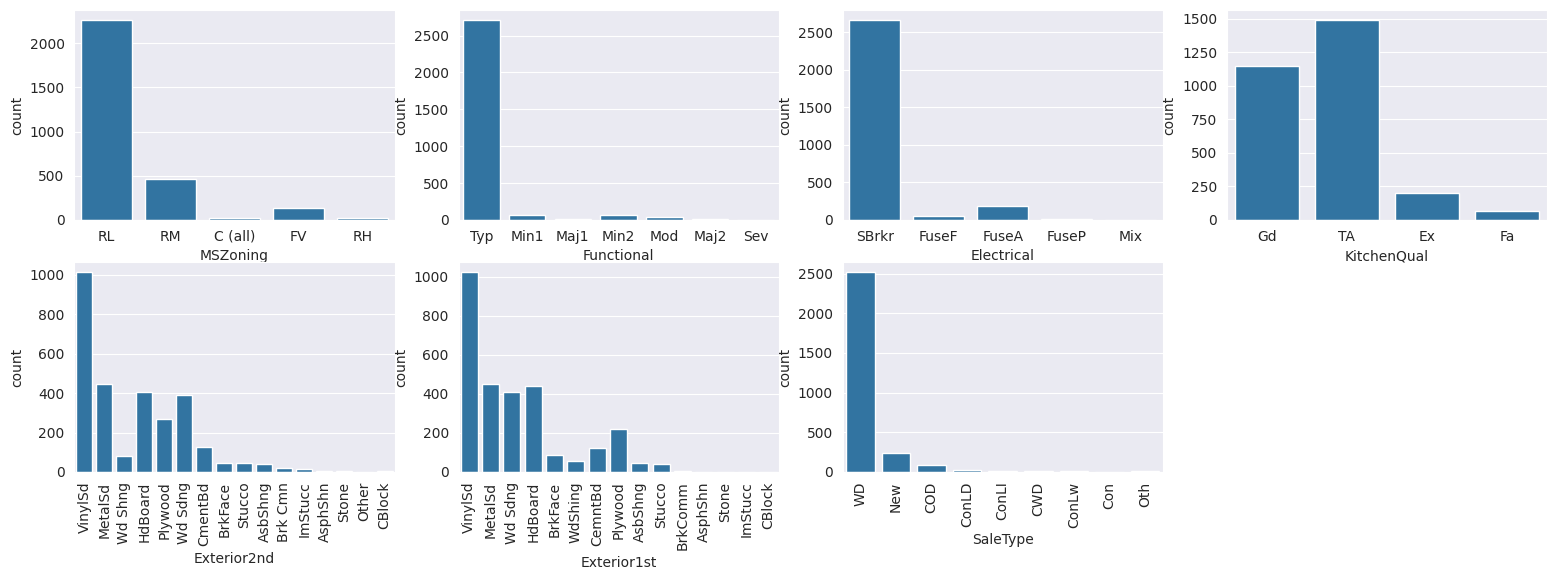

In [166]:
def plot_lpmvcs(loc, col, retation = 0):
  plt.subplot(2, 4, loc)

  sns.countplot(x= col, data=all_data)

  plt.xticks(rotation = retation)
  plt.xlabel(col)

plt.subplots(figsize = (19, 6))

for index, col in enumerate(obj_lpmvc.index):
  # max_value = max(len(str(val)) for val in all_data[col])
  uni_count = all_data[col].nunique()
  angle = 90 if uni_count > 8 else 0

  plot_lpmvcs(index + 1, col, angle)

plt.show()


 Filling Non-numeric LPMVCs with Highest-Frequency-Value

In [164]:
for col in obj_lpmvc.index:
  all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# High Percentage Missing Value Columns: HPMVC

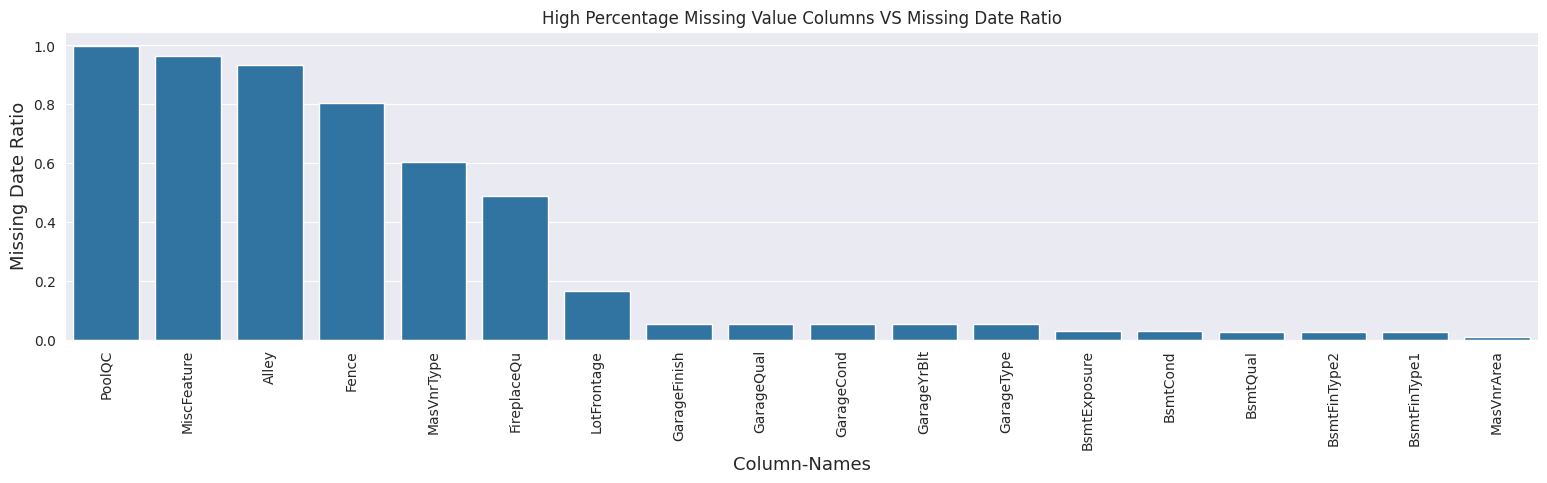

In [165]:
hpmvc = all_data_nan[: 18]
plt.subplots(figsize = (19, 4))
plt.xticks(rotation = 90)
sns.barplot(x = hpmvc.index, y = hpmvc)
plt.ylabel('Missing Date Ratio', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title("High Percentage Missing Value Columns VS Missing Date Ratio")
plt.show()



Distinguish Numeric and Non-numeric HPMVCs

In [173]:
# num_cols was define already.

num_hpmvc = hpmvc[[x in num_cols for x in hpmvc.index]]
obj_hpmvc = hpmvc[[x not in num_cols for x in hpmvc.index]]

#  removed LotFrontage from Numeric HPMVCs
num_lotfrontage = num_hpmvc[num_hpmvc.index == "LotFrontage"]
num_hpmvc = num_hpmvc.drop(num_lotfrontage.index)


Filling Numeric HPMVCs with ZERO

In [174]:
for col in num_hpmvc.index:
  all_data[col] = all_data[col].fillna(0)


In [175]:
obj_hpmvc

PoolQC          0.996908
MiscFeature     0.964617
Alley           0.932326
Fence           0.803847
MasVnrType      0.605634
FireplaceQu     0.487805
GarageFinish    0.054620
GarageQual      0.054620
GarageCond      0.054620
GarageType      0.053933
BsmtExposure    0.028169
BsmtCond        0.028169
BsmtQual        0.027825
BsmtFinType2    0.027482
BsmtFinType1    0.027138
dtype: float64

<font color='blue'>Non-numeric HPMVCs will be filled with the string: None
according the the data-description</font>

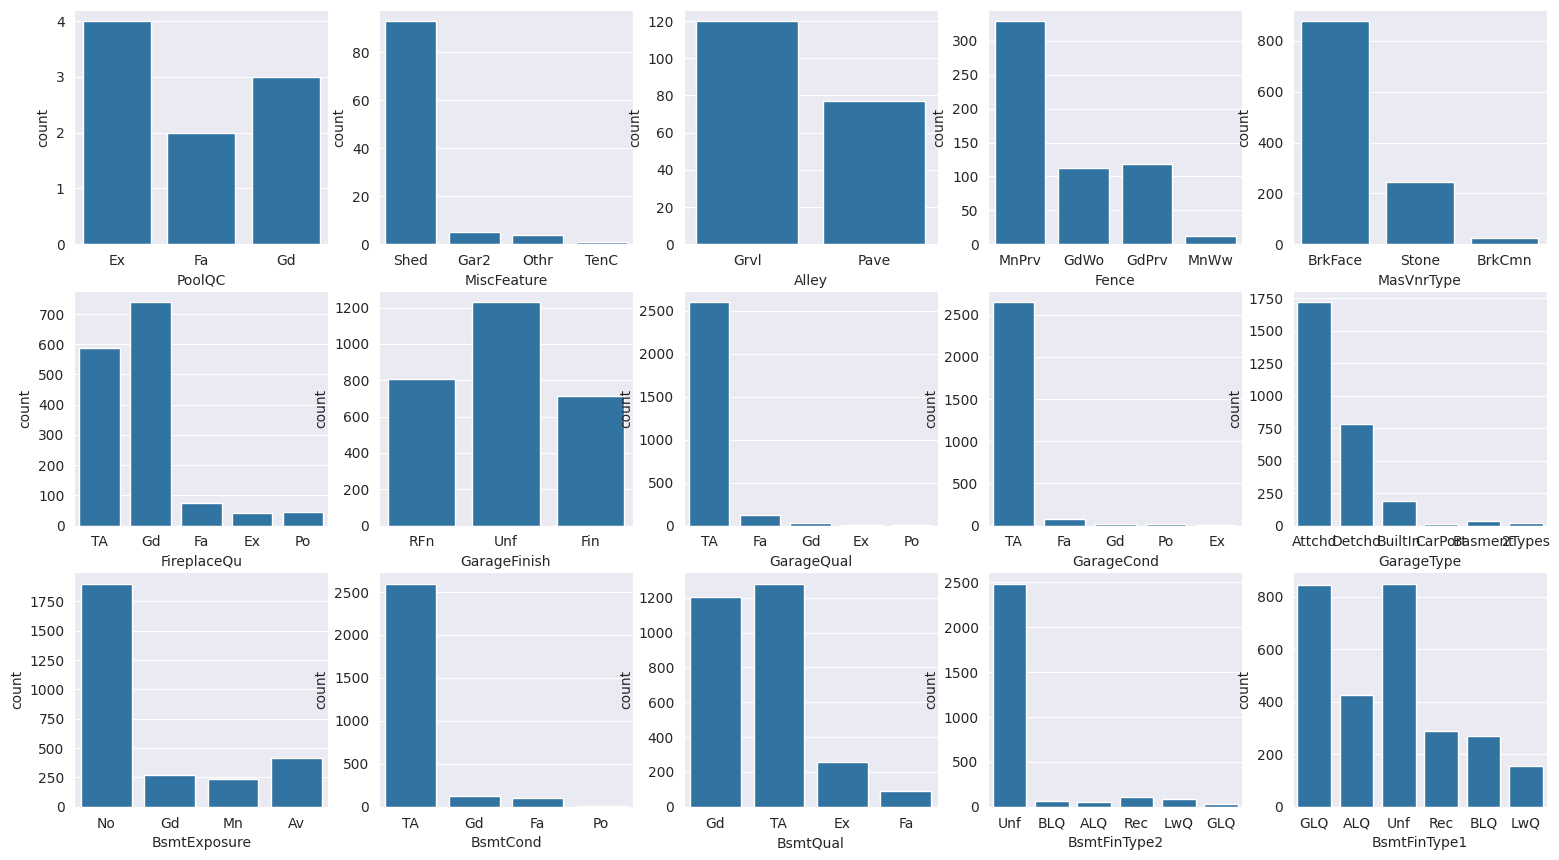

In [180]:
def plot_hpmvcs(loc, col, retation = 0):
  plt.subplot(4, 5, loc)
  sns.countplot(x= col, data=all_data)
  plt.xticks(rotation = retation)
  plt.xlabel(col)

plt.subplots(figsize = (19, 14))
for index, col in enumerate(obj_hpmvc.index):
  plot_hpmvcs(index + 1, col)

plt.show()


Filling missing values of non-neumeric HPMVCs with None

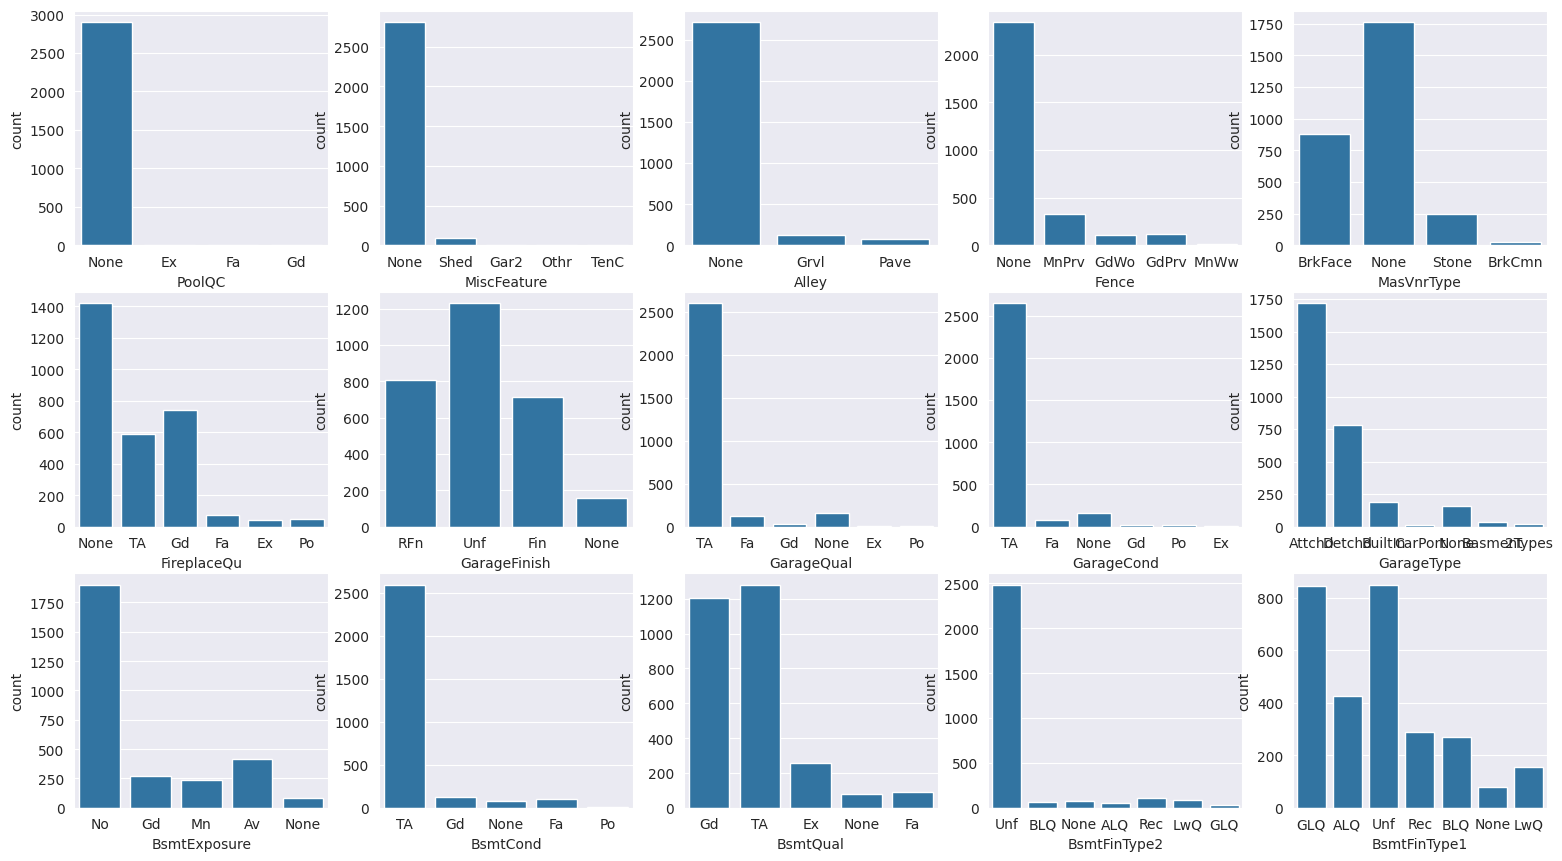

In [181]:
for col in obj_hpmvc.index:
  all_data[col] = all_data[col].fillna("None")

plt.subplots(figsize = (19, 14))
for index, col in enumerate(obj_hpmvc.index):
  plot_hpmvcs(index + 1, col)

plt.show()


# Dealing with LotFrontage Missing-values

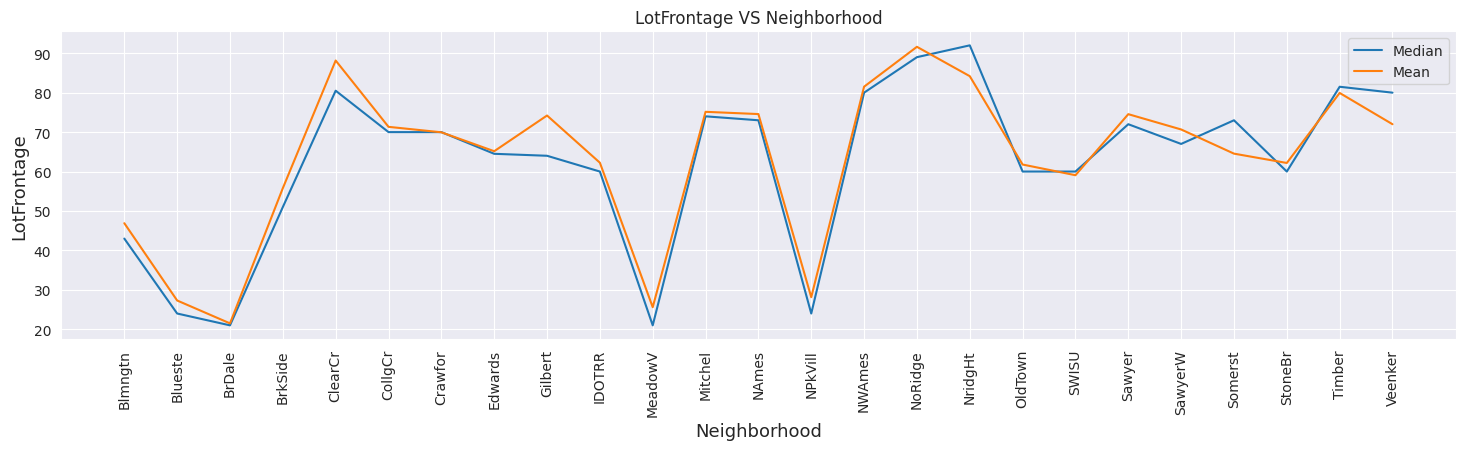

In [186]:
plt.figure(figsize = (18, 4))

median = plt.plot(all_data["LotFrontage"].groupby(all_data["Neighborhood"]).median(), label = "Median")
mean = plt.plot(all_data["LotFrontage"].groupby(all_data["Neighborhood"]).mean(), label = "Mean")

plt.ylabel('LotFrontage', fontsize=13)
plt.xlabel('Neighborhood', fontsize=13)
plt.xticks(rotation = 90)
plt.title("LotFrontage VS Neighborhood")
plt.legend()

plt.show()


In [1]:
col = "LotFrontage"

medians = all_data.groupby("Neighborhood")[col].median()
all_data[col] = all_data[col].fillna(all_data[col].map(medians))

# all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

NameError: name 'all_data' is not defined

# Dealing with Utilities

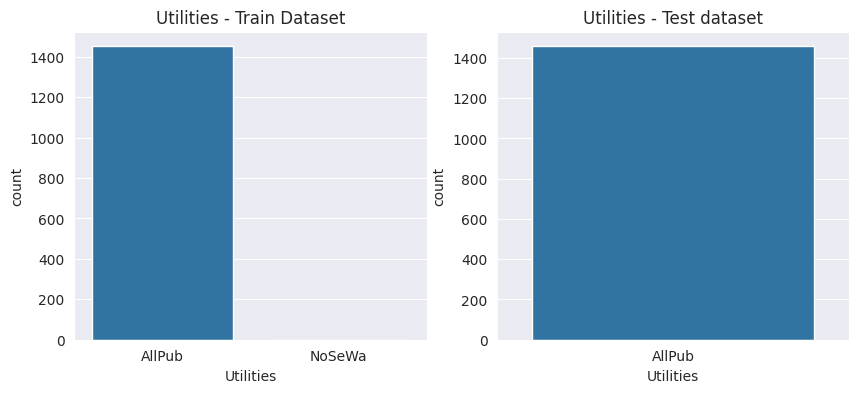

In [195]:
plt.subplots(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x = "Utilities", data = train_data)
plt.title("Utilities - Train Dataset")

plt.subplot(1, 2, 2)
sns.countplot(x = "Utilities", data = test_data)
plt.title("Utilities - Test dataset")

plt.show()


In [196]:
all_data = all_data.drop("Utilities", axis = 1)

# The FInal Check

In [204]:
all_data_nan = all_data.isna().sum() / len(all_data)
all_data_nan
all_data_nan = all_data_nan.drop(all_data_nan[all_data_nan  == 0].index).sort_values(ascending = False)
print(f"missing value : {all_data_nan.count()}")

missing value : 0


# <font color='blue'>Feature Engineering</font>


In [206]:
# CORRELATION MAP TO SEE HOW FEATURES ARE CORRELATED WITH SALEPRICE
corrmat = train_data.corr()
plt.subplots(figsize=(15,8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(219, 9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}) #annot=True/False
plt.show()

ValueError: could not convert string to float: 'RL'